In [2]:
##importing important libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
from scipy.stats import probplot

In [3]:
##loading "bengaluru_house_prices.csv" dataset
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
# dataframe df1 has 13320 rows and 9 columns(features). 
df1.shape

(13320, 9)

In [5]:
##the columns of the dataframe
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
#This line ofcode is used to retrieve the unique values present in the "area_type" column of the DataFrame df1.
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
#This line of code is used to obtain a count of unique values in the "area_type" column of the DataFrame 
#Super built-up  Area, Built-up  Area, Plot  Area, Carpet  Area are the unique values of the "area_type" column 
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
# Trying to find correlation of the features with the target column
correlation_matrix = df1.corr()

# Extract correlations of features with the target column
correlation_with_target = df1.corrwith(df1["price"])
# Display the correlation values
print("Correlation with the target variable:")
print(correlation_with_target)
###since 'area_type','society','balcony','availability', location columns contain categorical values, so correaltion values among those and the target are not calculated.
##here on can see that there is no correlation shown between total_sqft and the price, because python is considering it as an object

Correlation with the target variable:
bath       0.456345
balcony    0.120355
price      1.000000
dtype: float64


C:\Users\Gaurob\AppData\Local\Temp\ipykernel_9524\1912613172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()
C:\Users\Gaurob\AppData\Local\Temp\ipykernel_9524\1912613172.py:5: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df1.corrwith(df1["price"])


In [9]:
##To solve this problem I will convert df1['total_sqft'] into numeric values

In [10]:
#is converting the 'total_sqft' column in the DataFrame df1 to numeric values. 
df1['total_sqft'] = pd.to_numeric(df1['total_sqft'], errors='coerce')

# Include all columns in numerical columns
numerical_columns = df1.select_dtypes(include='number')

# Assuming df1 is your DataFrame with features and target column
correlation_matrix = df1.corr()

# Extract correlations of features with the target column
correlation_with_target = df1.corrwith(df1["price"])

# Display the correlation values
print("Correlation with the target variable:")
print(correlation_with_target)
print("\ncorrelation_matrix:")
print(correlation_matrix)


Correlation with the target variable:
total_sqft    0.572904
bath          0.456345
balcony       0.120355
price         1.000000
dtype: float64

correlation_matrix:
            total_sqft      bath   balcony     price
total_sqft    1.000000  0.387206  0.155187  0.572904
bath          0.387206  1.000000  0.204201  0.456345
balcony       0.155187  0.204201  1.000000  0.120355
price         0.572904  0.456345  0.120355  1.000000


C:\Users\Gaurob\AppData\Local\Temp\ipykernel_9524\1800973991.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()
C:\Users\Gaurob\AppData\Local\Temp\ipykernel_9524\1800973991.py:11: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df1.corrwith(df1["price"])


In [11]:
#dropping the 'area_type','society','balcony',availability' column from the DataFrame for simplicity
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [12]:
###Data cleaning: I will try to find null values for each features
df2.isnull().sum()

location        1
size           16
total_sqft    247
bath           73
price           0
dtype: int64

In [13]:
##I don't to want lose any data,so i won't drop any rows
# Fill the missing values with the mean of the column
df2['total_sqft'].fillna(df2['total_sqft'].mean(), inplace=True)
df2['bath'].fillna(df2['bath'].mean(), inplace=True)
df2.shape

(13320, 5)

In [14]:
##since the location and size columns contain categorical values, I will drop those rows taht contain missing values
df3 = df2.dropna()
df3.shape

(13303, 5)

<h2 style='color:blue'>Feature Engineering</h2>

In [15]:
#Add new feature(integer) for (Bedrooms Hall Kitchen)
###converting the size column into a numerical  value column, that will contain the number of bedrooms
df3['Bedroom_Hall_Kitchen'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.drop('Bedroom_Hall_Kitchen',axis=1)
##getting the unique values for the 'Bedroom_Hall_Kitchen' column
df3.Bedroom_Hall_Kitchen.unique()

C:\Users\Gaurob\AppData\Local\Temp\ipykernel_9524\2991318599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bedroom_Hall_Kitchen'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [17]:
# I am trying to find whether the 'total_sqft' column does not contain float values. 
#I f that happened I would try to convert them into float

# Define the is_float function
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

# Apply the function to filter rows
df4 = df3[df3['total_sqft'].apply(is_float)]
df4["price_in_lac"]=df4["price"]*100000

df4

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3907000.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,12000000.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,6200000.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,9500000.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,5100000.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,23100000.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,40000000.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,6000000.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,48800000.0


In [18]:
#Feature Engineering
#Add new feature called price per square feet
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']/df5['total_sqft'])*100000
df5.head(10)

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3907000.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,12000000.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,6200000.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,9500000.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,5100000.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3800000.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,20400000.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,60000000.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,6325000.0,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,37000000.0,36274.509804


In [19]:
#printing statistics
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.330300e+04
mean     7.943137e+03
std      1.063166e+05
min      2.678298e+02
25%      4.250230e+03
50%      5.446293e+03
75%      7.362800e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
#Examine locations which is a categorical variable. 
#We need to apply dimensionality reduction technique here to reduce number of locations
# this next line of code ensures that the 'location' column in the DataFrame df5 is cleaned from any unnecessary whitespaces
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [21]:
#location_stats.values.sum() is summing up all the frequencies of the locations within the 'location_stats' data structure. 
location_stats.values.sum()

13303

In [22]:
#determining the number of locations in  location_stats where the location occurences are greater than 10.
len(location_stats[location_stats>10])

241

In [23]:
#calculates and returns the number of locations in the location_stats
len(location_stats)

1293

In [24]:
##determining the number of locations in  location_stats where the location occurences are less or equal than 10.
len(location_stats[location_stats<=10])

1052

<h2 style="color:blue">Dimensionality Reduction</h2>
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [26]:
# calculates the number of unique values in the 'location' column of the DataFrame df5
len(df5.location.unique())

1293

In [27]:
#In summary, the code is replacing locations in the 'location' column of df5 that have a frequency less than 10 with the string 'other'. 
#The subsequent calculation len(df5.location.unique()) then provides the count of unique values in the 'location' column after this transformation. 
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3907000.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,12000000.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,6200000.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,9500000.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,5100000.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3800000.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,20400000.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,60000000.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,6325000.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,37000000.0,36274.509804


<h2 style="color:blue">Outlier Removal Using Business Logic</h2>
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 Bedroom_Hall_Kitchen apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 Bedroom_Hall_Kitchen than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [29]:
# is filtering the DataFrame df5 to include only those rows where the result of the expression (total_sqft / Bedroom_Hall_Kitchen) is less than 300.
#This kind of filtering is commonly used to identify outliers or unusual values in a dataset.
outlier=df5[df5.total_sqft/df5.Bedroom_Hall_Kitchen<300]
outlier.head()

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,37000000.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,20000000.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,15000000.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,8500000.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,10000000.0,20000.000000


Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [30]:
df5.shape

(13303, 8)

In [31]:
df6 =df5[df5.total_sqft/df5.Bedroom_Hall_Kitchen>300]
df6.shape

(12373, 8)

In [32]:
df6.price_per_sqft.describe()
#Here we find that min price per sqft is 267 rs/sqft whereas max is 176470
#this shows a wide variation in property prices.

count     12373.000000
mean       6247.360603
std        4140.799216
min         267.829813
25%        4186.952288
50%        5272.108844
75%        6863.905325
max      176470.588235
Name: price_per_sqft, dtype: float64

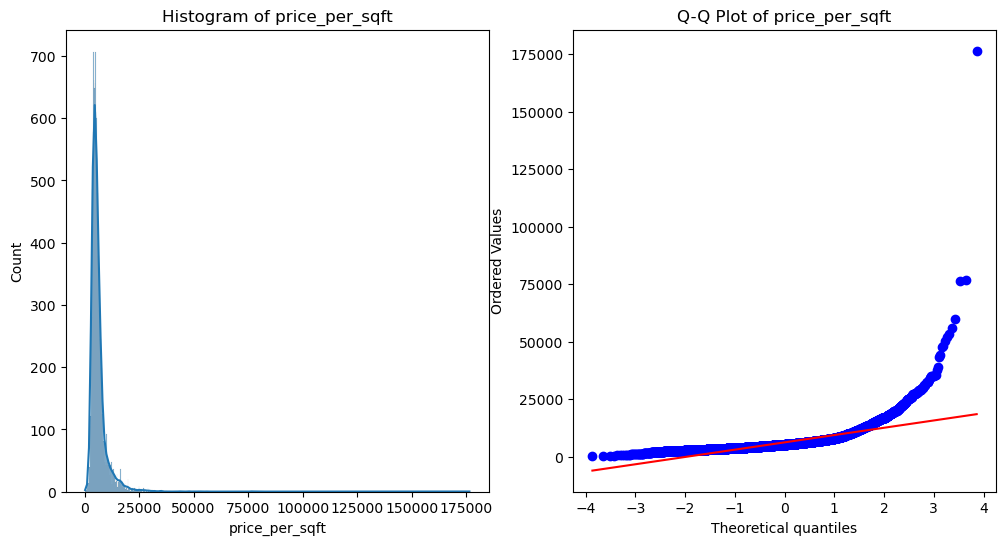

In [33]:
# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df6['price_per_sqft'], kde=True)
plt.title('Histogram of price_per_sqft')

# Plot probability plot (Q-Q plot)
plt.subplot(1, 2, 2)
probplot(df6['price_per_sqft'], plot=plt)
plt.title('Q-Q Plot of price_per_sqft')

plt.show()


### If you see the histogram in the left, you will find there are some outliers
##for the Q-Q plot in the right, 
# the Red line follows the normal distribution the blue line is the distribution. It deviated from the Red line.
#So, the distribution is not normally distributed.
##So, for the better persormance for the ML model, I will remove the outliers.
## I should remove outliers per location using mean and one standard deviation

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10210, 8)

**Let's check if for a given location how does the 2 Bedroom_Hall_Kitchen and 3 Bedroom_Hall_Kitchen property prices look like**

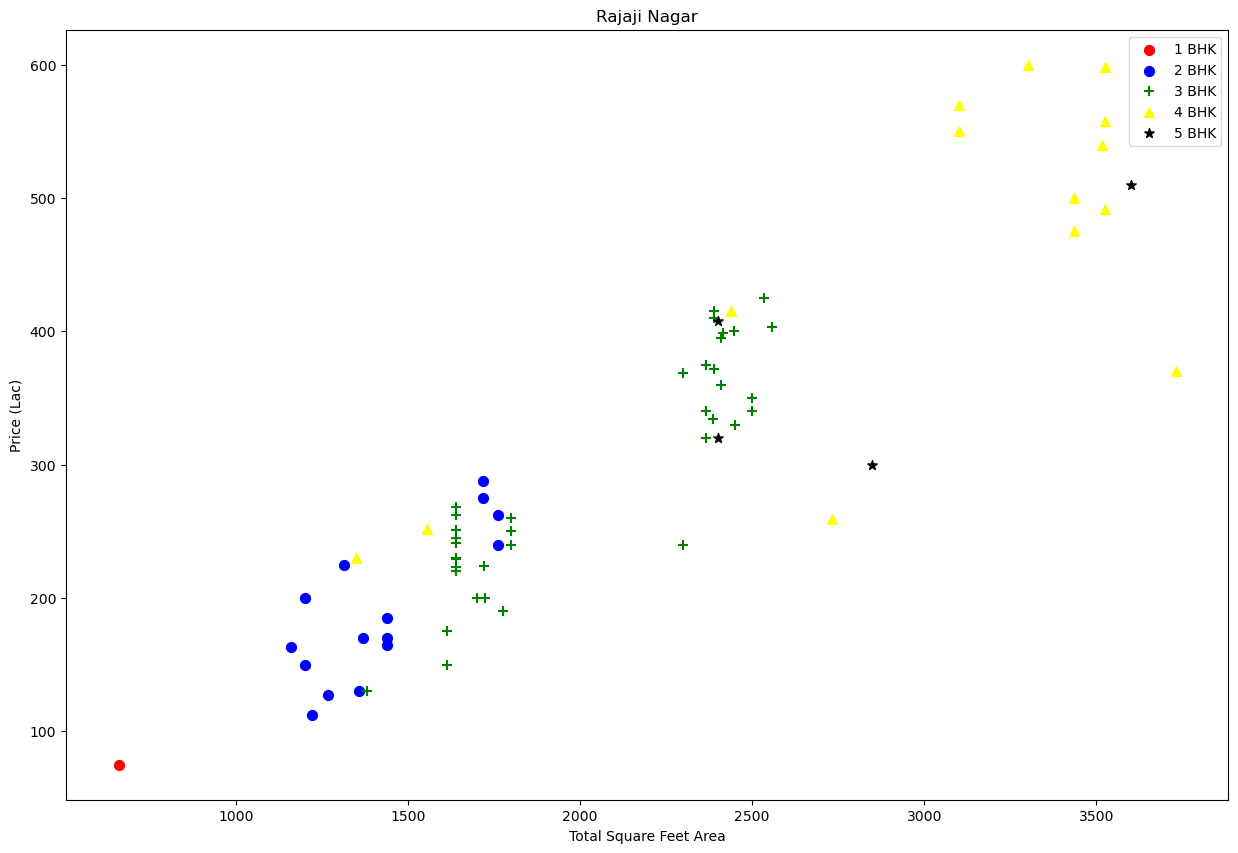

In [35]:
def plot_scatter_chart(df,location):
    bhk1= df7[(df7.location==location) & (df7.Bedroom_Hall_Kitchen==1)]
    bhk2 = df7[(df7.location==location) & (df7.Bedroom_Hall_Kitchen==2)]
    bhk3 = df7[(df7.location==location) & (df7.Bedroom_Hall_Kitchen==3)]
    bhk4 = df7[(df7.location==location) & (df7.Bedroom_Hall_Kitchen==4)]
    bhk5 = df7[(df7.location==location) & (df7.Bedroom_Hall_Kitchen==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.total_sqft,bhk1.price,color='red',label='1 BHK', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,marker='^', color='yellow',label='4 BHK', s=50)
    plt.scatter(bhk5.total_sqft,bhk5.price,marker='*', color='black',label='5 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lac)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

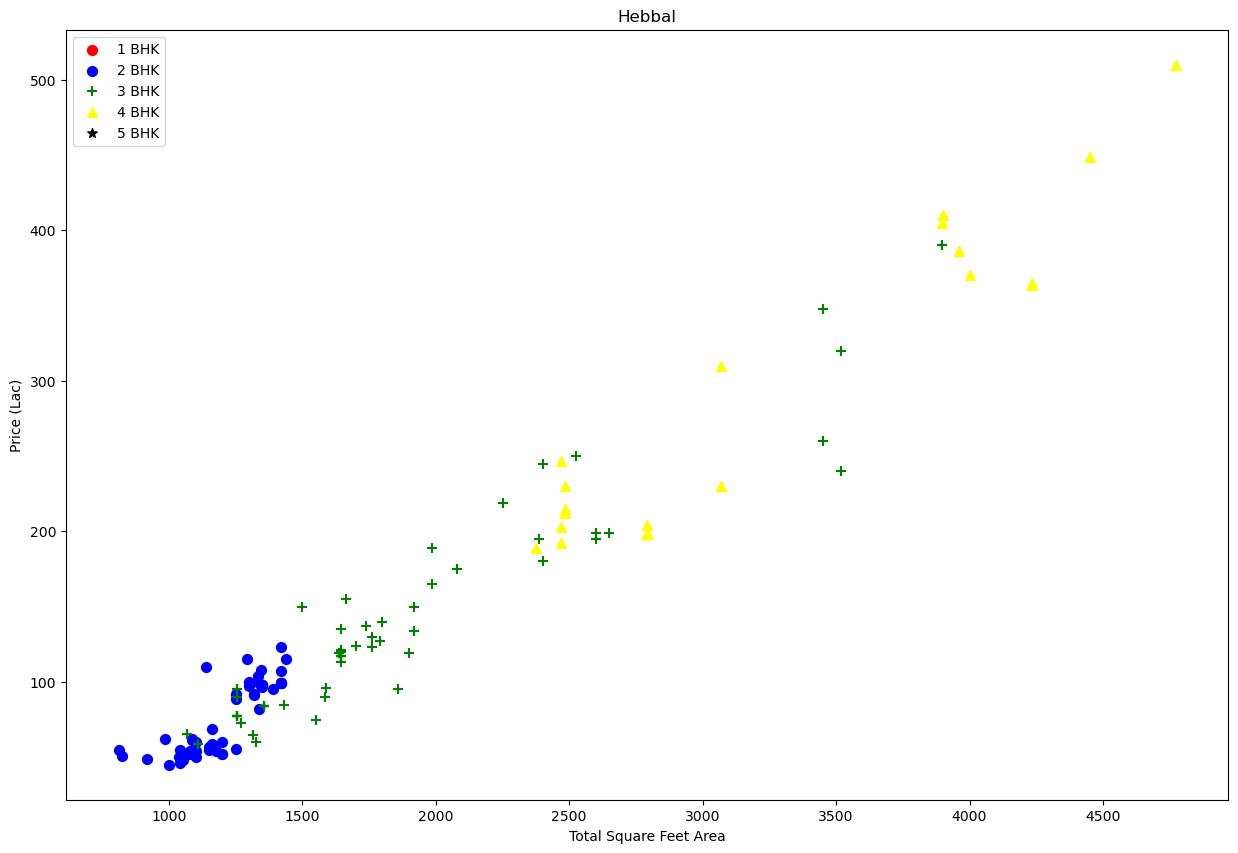

In [36]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [37]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedroom_Hall_Kitchen'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedroom_Hall_Kitchen'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7262, 8)

<h3 style='color:green'>after outlier removal: Rajaji Nagar</h3>

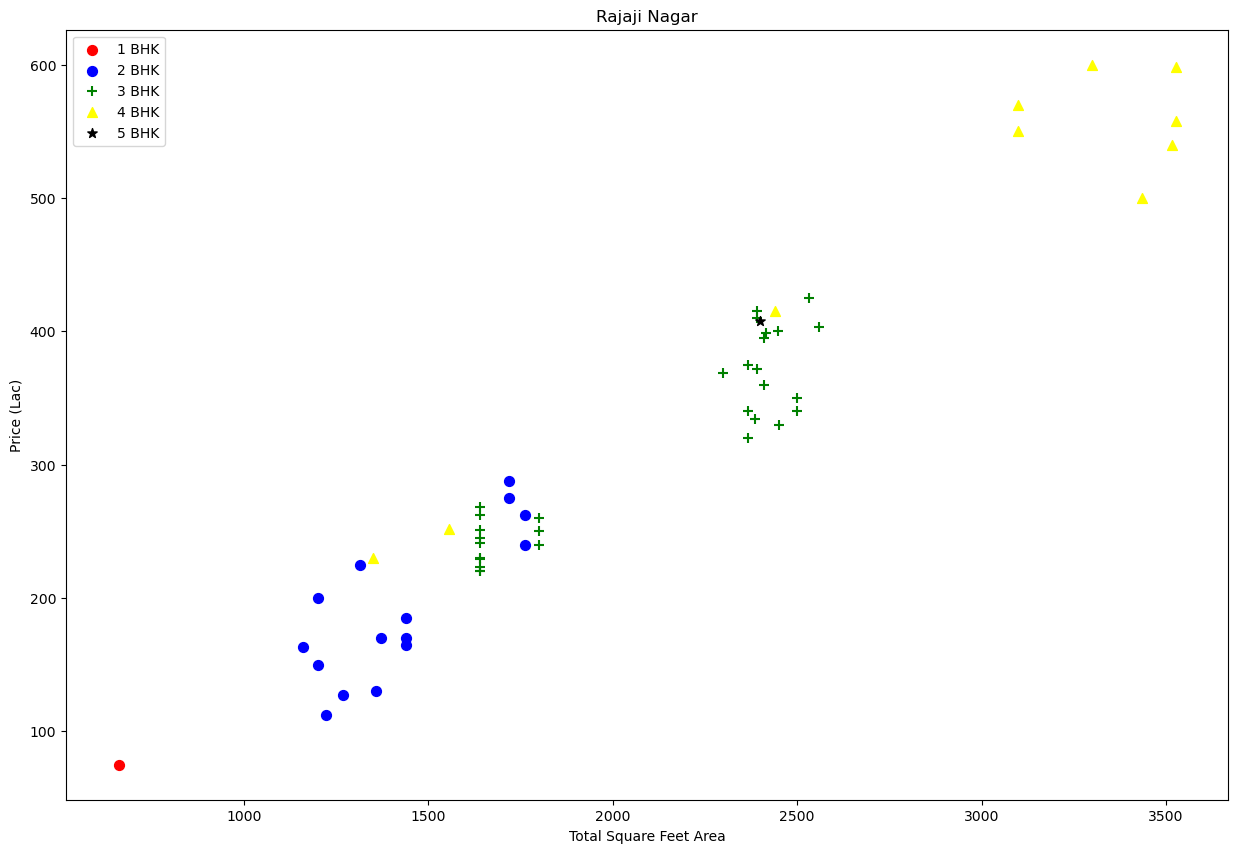

In [38]:
def plot_scatter_chart(df,location):
    bhk1= df8[(df8.location==location) & (df8.Bedroom_Hall_Kitchen==1)]
    bhk2 = df8[(df8.location==location) & (df8.Bedroom_Hall_Kitchen==2)]
    bhk3 = df8[(df8.location==location) & (df8.Bedroom_Hall_Kitchen==3)]
    bhk4 = df8[(df8.location==location) & (df8.Bedroom_Hall_Kitchen==4)]
    bhk5 = df8[(df8.location==location) & (df8.Bedroom_Hall_Kitchen==5)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.total_sqft,bhk1.price,color='red',label='1 BHK', s=50)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,marker='^', color='yellow',label='4 BHK', s=50)
    plt.scatter(bhk5.total_sqft,bhk5.price,marker='*', color='black',label='5 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lac)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

<h3 style='color:green'>after outlier removal: Hebbal</h3>

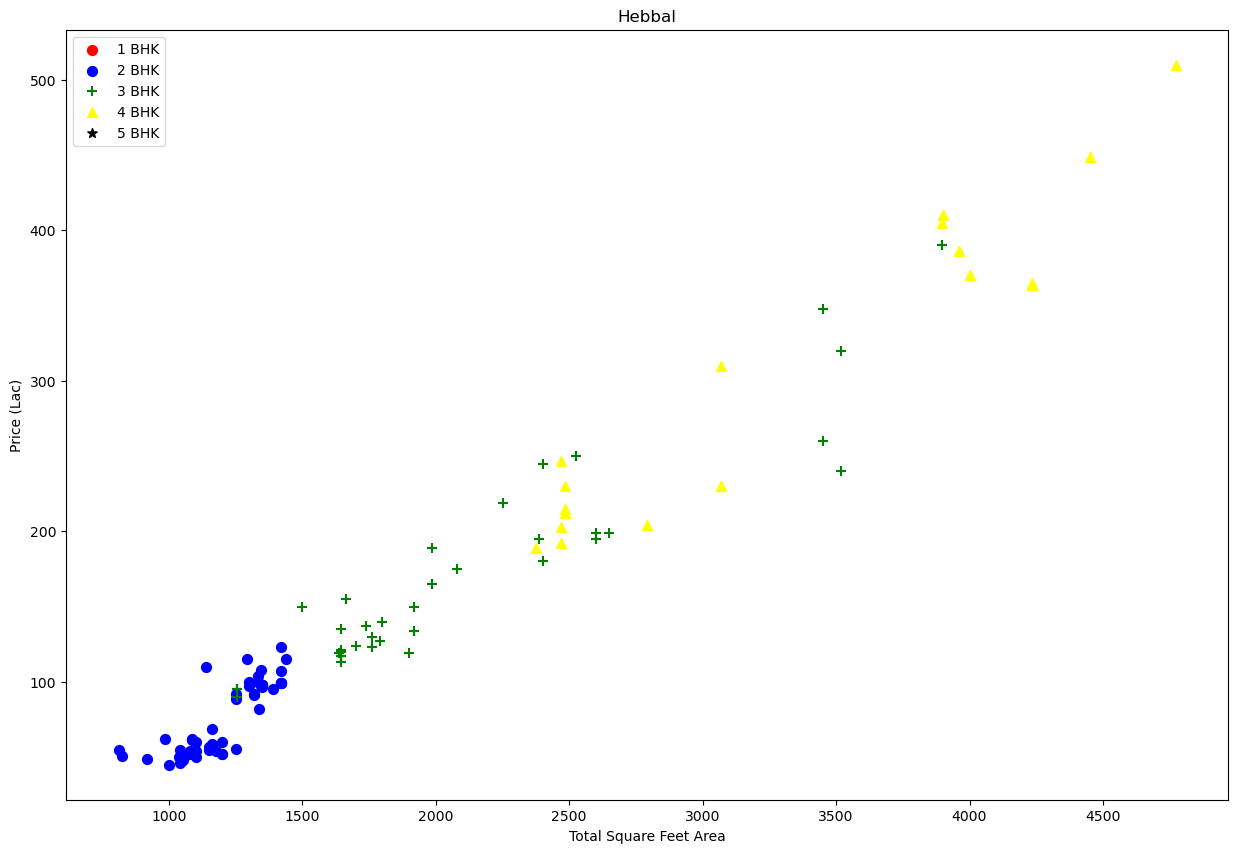

In [39]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

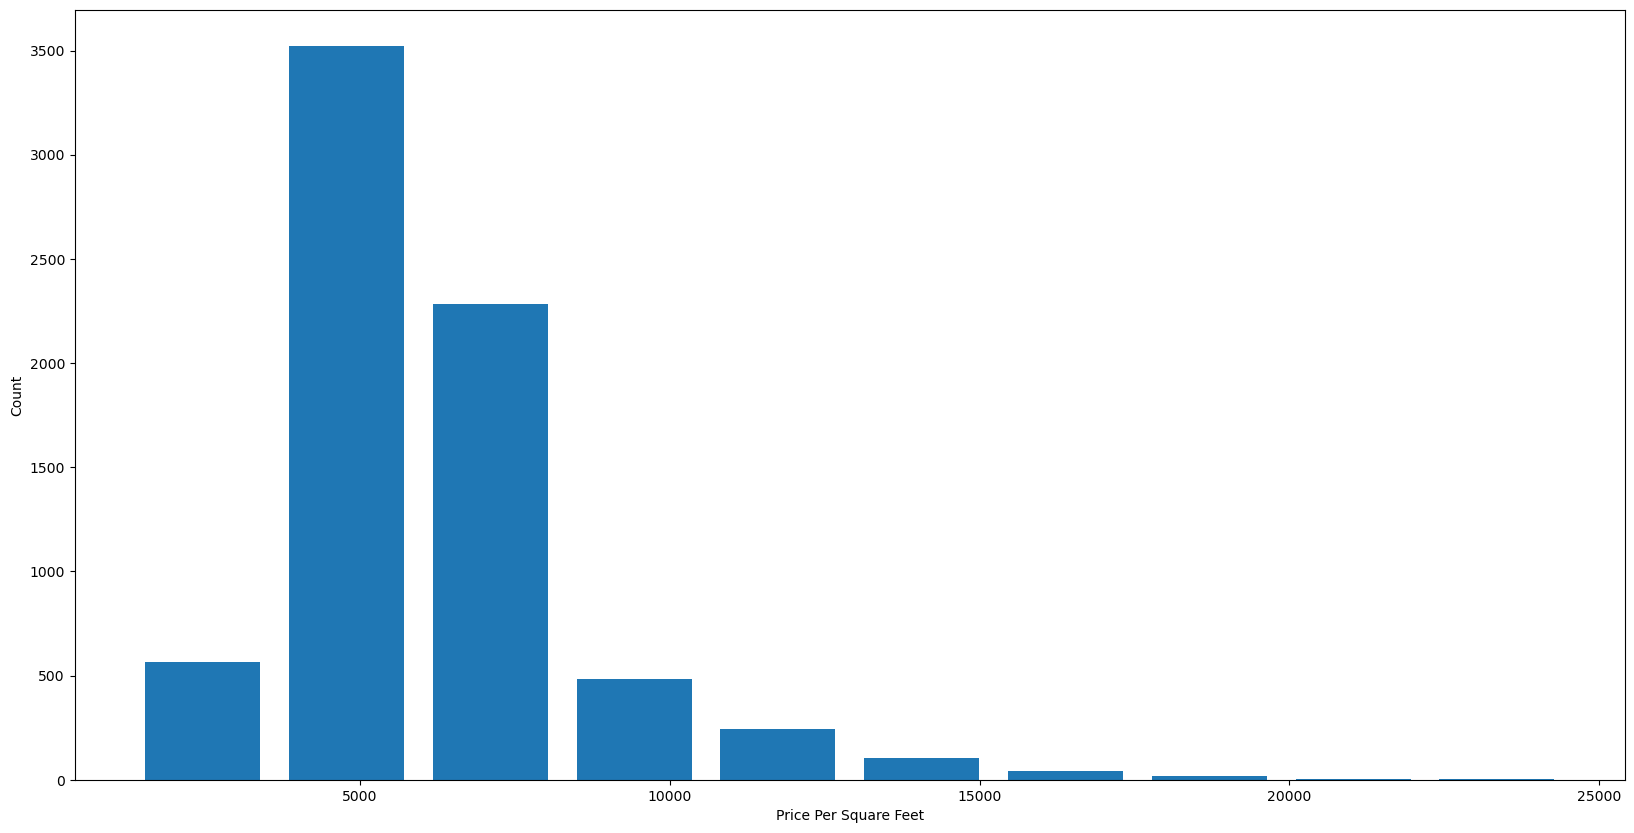

In [40]:
##I want to see the frequency of flats "per square feet"
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [41]:
df8.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  8.        ,  5.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

## it is very unusual  that one flat has 8,5,7,9,12,13,16, 2.69.. numbers of bathrooms.
## these might be outliers and need to be checked.


In [44]:
df8[df8["bath"]>5]

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac,price_per_sqft
34,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,45100000.0,15033.333333
270,Abbigere,6 Bedroom,2500.0,6.0,81.0,6,8100000.0,3240.000000
508,Arekere,4 BHK,2710.0,6.0,142.0,4,14200000.0,5239.852399
583,BTM Layout,6 Bedroom,3300.0,6.0,165.0,6,16500000.0,5000.000000
745,Banashankari Stage III,6 Bedroom,3000.0,6.0,150.0,6,15000000.0,5000.000000
...,...,...,...,...,...,...,...,...
9917,other,6 Bedroom,7000.0,6.0,560.0,6,56000000.0,8000.000000
9959,other,6 Bedroom,2750.0,6.0,200.0,6,20000000.0,7272.727273
10055,other,5 Bedroom,1650.0,6.0,200.0,5,20000000.0,12121.212121
10172,other,4 BHK,6652.0,6.0,660.0,4,66000000.0,9921.828022


Text(0, 0.5, 'Count')

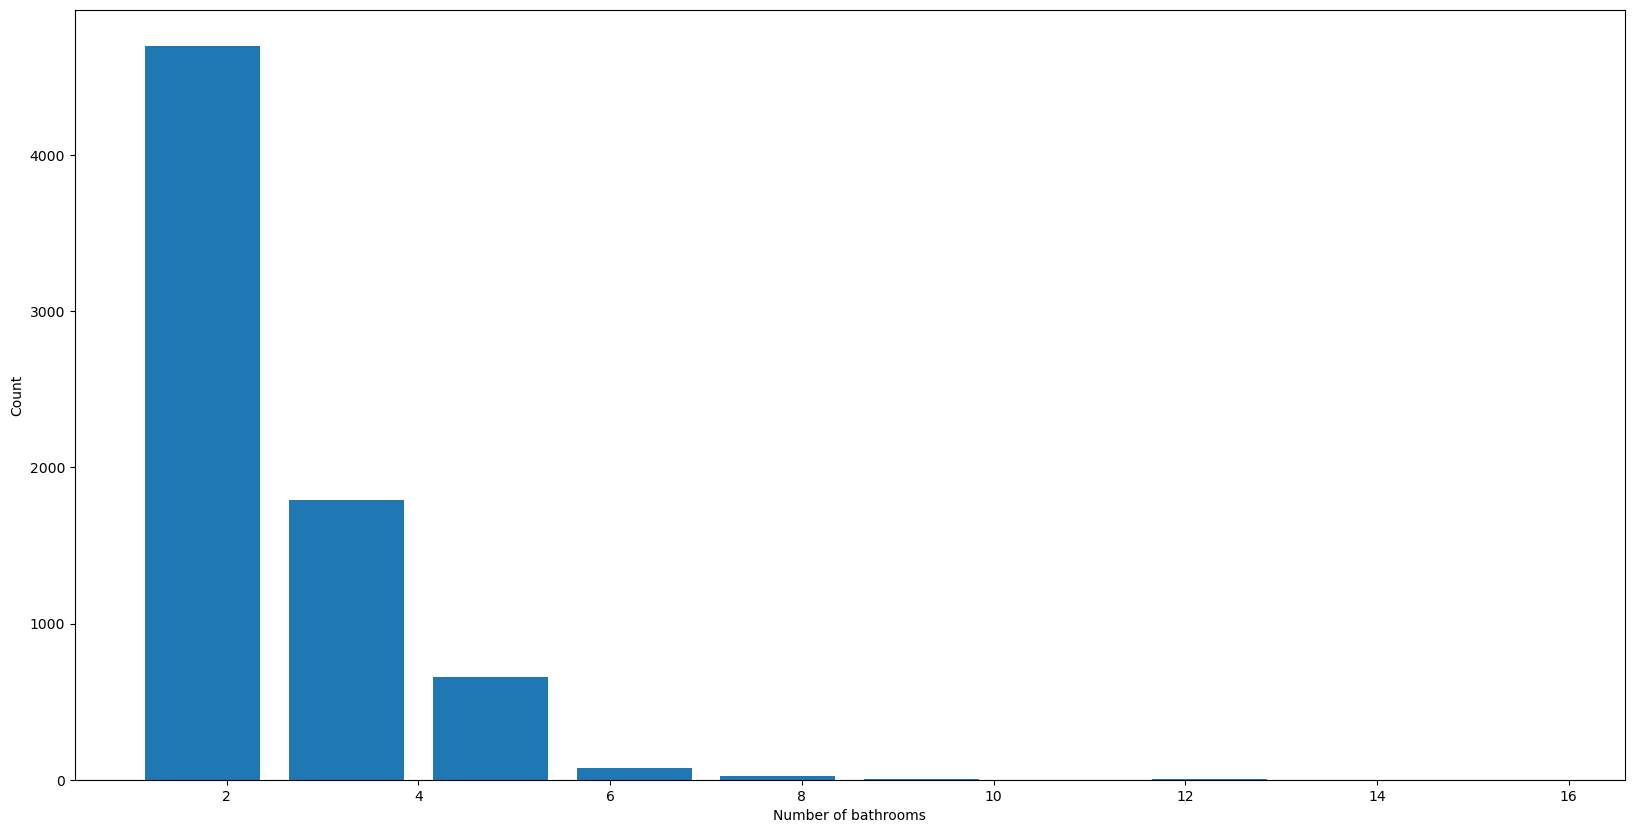

In [45]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

# Most of the flats have 2 baths and there are some outliers also.

In [47]:
## I am trying to find to which flats' baths' number are two more than the number of bedrooms
## it is unusual that number of bath is 2 more than the number of bedroom
df8[df8.bath>df8.Bedroom_Hall_Kitchen+2]

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac,price_per_sqft
1581,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,8000000.0,3252.032520
5224,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,45000000.0,6428.571429
6738,Thanisandra,3 BHK,1806.0,6.0,116.0,3,11600000.0,6423.034330
8412,other,6 BHK,11338.0,9.0,1000.0,6,100000000.0,8819.897689


## For this case, that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. 
# Anything above that is an outlier or a data error and can be removed.



In [49]:
df9 = df8[df8.bath<df8.Bedroom_Hall_Kitchen+2]
df9.shape

(7181, 8)

In [50]:
df9.head()

,location,size,total_sqft,bath,price,Bedroom_Hall_Kitchen,price_in_lac,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,42800000.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,19400000.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,23500000.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,13000000.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,14800000.0,11983.805668


In [53]:
## I will drop these 3 columns
##Cause, I converted "size" coulmn into the "Bedroom_Hall_Kitchen" column, that contains only numerical values, for convenience
#I created "price_per_sqft" for analysis purpose, I don't need it for training the model
##I converted "price" column into "price_in_lac" to get the actual price
df10=df9.drop(["size","price_per_sqft","price"],axis=1)
df10

,location,total_sqft,bath,Bedroom_Hall_Kitchen,price_in_lac
0,1st Block Jayanagar,2850.0,4.0,4,42800000.0
1,1st Block Jayanagar,1630.0,3.0,3,19400000.0
2,1st Block Jayanagar,1875.0,2.0,3,23500000.0
3,1st Block Jayanagar,1200.0,2.0,3,13000000.0
4,1st Block Jayanagar,1235.0,2.0,2,14800000.0
...,...,...,...,...,...
10201,other,1200.0,2.0,2,7000000.0
10202,other,1800.0,1.0,1,20000000.0
10205,other,1353.0,2.0,2,11000000.0
10206,other,812.0,1.0,1,2600000.0


## The location column is very important for the prediction.
## But the column contains "text" categorical data, which ML models can't process well.
## I wiil use one-hot-encoding to convert these categorical values into numerical values.

# One hot Encoding for the "Location" Column

In [54]:
## it creates particular columns for particular location
## if a particular place comes into the scenario, in the place of row value 1 is assigned, other locations will get 0s for their row values. 
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ## The dummy variable trap occurs when you include both dummy variables in your model. 
# This is because the information about one category can be perfectly predicted from the other. 
# In other words, if you know the value of "Category_A," you also know the value of "Category_B" (and vice versa).
# Here, location "1st Block Jayanagar" has 1 for row values, other locations have 0 for that.
# if I drop "1st Block Jayanagar", 0s in other locations will still represent "1st Block Jayanagar" column.
# To avoid the dummy variable trap, you typically drop one of the dummy variables. Here, I will drop "other" column.
# This is known as "dropping one level" or "omitting one category." 
# By doing this, you ensure that the dummy variables are not perfectly correlated, and the model can be accurately interpreted.

In [55]:
##Now, I will append this dataframe into my original dataframe
##concat is used to appenf two dataframe
### I concated 2 dfs on colums, so, I used axis="columns"

df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,Bedroom_Hall_Kitchen,price_in_lac,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,42800000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,3,19400000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,23500000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,3,13000000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,14800000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
##Since I have one hot encoded dataframe I will drop the "location column"
df12 = df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,Bedroom_Hall_Kitchen,price_in_lac,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,42800000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,19400000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,23500000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,13000000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,14800000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building the model

In [57]:
df12.shape

(7181, 245)

In [60]:
## dropping the dependent variable """price"""
X = df12.drop(['price_in_lac'],axis=1)
X.head()

,total_sqft,bath,Bedroom_Hall_Kitchen,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X.shape

(7181, 244)

In [62]:
y = df12.price_in_lac
y.head(3)

0    42800000.0
1    19400000.0
2    23500000.0
Name: price_in_lac, dtype: float64

In [63]:
len(y)

7181

In [70]:
#X and y are the feature matrix and target variable, respectively.
#test_size=0.2: This parameter specifies the proportion of the dataset to include in the test split.
#In this case, it's set to 20%, meaning 80% of the data will be used for training, and 20% will be used for testing.
#random_state=10: This parameter ensures reproducibility by fixing the random seed. 
#It means that if you run this code multiple times with the same random_state, you'll get the same split each time.
#X_train: The training set for features.
#X_test: The testing set for features.
#y_train: The training set for the target variable.
#y_test: The testing set for the target variable.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [65]:
#lr_clf = LinearRegression(): This line creates an instance of the LinearRegression class and assigns it to the variable lr_clf. 
#lr_clf is now an object that represents the linear regression model.
#lr_clf.fit(X_train, y_train): This line fits (trains) the linear regression model on the training data.
#The fit method takes two arguments: the feature matrix X_train and the target variable y_train.
#lr_clf.score(X_test, y_test): This line calculates the R² (coefficient of determination) score of the linear regression model on the testing data. 
#The score method takes two arguments: the feature matrix X_test and the target variable y_test. 
#The R² score is a measure of how well the model explains the variance in the target variable. 
#It ranges from 0 to 1, where 1 indicates a perfect fit.
#The score method returns the R² score, and in this context, it represents the goodness of fit of the model on the testing data.
#A higher R² score suggests that the model's predictions are closer to the actual values in the testing set.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8681376210925936

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [72]:
#from sklearn.model_selection import ShuffleSplit: 
#This line imports the ShuffleSplit class, which is a cross-validation strategy that shuffles the data and splits 
#it into training and testing sets multiple times. 
#It is useful for situations where you want to perform multiple random splits.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82664495, 0.79211148, 0.82821371, 0.83923278, 0.76122474])

**This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [81]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.809486,{}
1,lasso,0.809490,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.706285,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


*Both Linear Regression and Lasso regression give the similar result.


<h2 style='color:blue'>Test the model for few properties</h2>

In [91]:
def predict_price(location,sqft,bath,bhk):  
    #This line defines a function named predict_price that takes four input parameters: location, sqft, bath, and bhk.
    loc_index = np.where(X.columns==location)[0][0]
    #This line uses NumPy's np.where function to find the index of the specified location within the columns of the feature matrix X.
    #It assumes that X is a pandas DataFrame with columns representing different features, including the location. 
    #The [0][0] indexing is used to extract the actual index value.

    x = np.zeros(len(X.columns))
    #This line initializes a NumPy array x with zeros. 
    #The length of this array is set to the number of columns in the feature matrix X.
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    #These lines set the values of the first three elements of the feature vector x to the input parameters sqft, bath, and bhk, respectively.
    if loc_index >= 0:
        x[loc_index] = 1
        #This conditional statement checks if the index of the specified location is non-negative. 
        #If it is, it sets the corresponding element in the feature vector x to 1. 
        #This is used for one-hot encoding, where the presence of a particular location is indicated by setting its corresponding element to 1.

    return lr_clf.predict([x])[0]
#This line uses the pre-trained linear regression model lr_clf to make a prediction for the input feature vector x. 
#The feature vector is passed as a single-item list ([x]) to the predict method. 
#The result is a one-element array, and [0] is used to extract the actual predicted price, which is then returned by the function.

In [87]:
price=predict_price('1st Phase JP Nagar',1000, 2, 2)
print("The price of a house at 1st Phase JP Nagar, area of 1000 sqft with 2 bath and 2 bedrooms is: ",price)

The price of a house at 1st Phase JP Nagar, area of 1000 sqft with 2 bath and 2 bedrooms is:  8752931.745845282


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
predict_price('1st Phase JP Nagar',1000, 3, 3)
print("The price of a house at 1st Phase JP Nagar, area of 1000 sqft with 3 bath and  bedrooms is: ",price)

The price of a house at 1st Phase JP Nagar, area of 1000 sqft with 3 bath and  bedrooms is:  8752931.745845282


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [89]:
predict_price('Indira Nagar',1000, 2, 2)
print("The price of a house at Indira Nagar, area of 1000 sqft with 2 bath and 2 bedrooms is: ",price)

The price of a house at Indira Nagar, area of 1000 sqft with 2 bath and 2 bedrooms is:  8752931.745845282


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
predict_price('Indira Nagar',1000, 3, 3)
print("The price of a house at Indira Nagar, area of 1000 sqft with 3 bath and 3 bedrooms is: ",price)

The price of a house at Indira Nagar, area of 1000 sqft with 3 bath and 3 bedrooms is:  8752931.745845282


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
